In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
X_train, X_test = X_train.reshape(-1, 28,28,1), X_test.reshape(-1, 28,28,1)

In [7]:
model_1 = keras.Sequential([
    
    keras.Input(shape=(28,28,1)),
    
   
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
   
    layers.Dense(units=10, activation='softmax')
])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [9]:
model_1.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [10]:
h1 = model_1.fit(x=X_train, y=Y_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 65s 37ms/step - loss: 0.2924 - accuracy: 0.9241 - val_loss: 0.0825 - val_accuracy: 0.9758
Epoch 2/5
1715/1715 [==============================] - 64s 37ms/step - loss: 0.0879 - accuracy: 0.9730 - val_loss: 0.1244 - val_accuracy: 0.9657
Epoch 3/5
1715/1715 [==============================] - 68s 39ms/step - loss: 0.0720 - accuracy: 0.9782 - val_loss: 0.0710 - val_accuracy: 0.9807
Epoch 4/5
1715/1715 [==============================] - 68s 40ms/step - loss: 0.0609 - accuracy: 0.9822 - val_loss: 0.0756 - val_accuracy: 0.9778
Epoch 5/5
1715/1715 [==============================] - 64s 37ms/step - loss: 0.0520 - accuracy: 0.9844 - val_loss: 0.0760 - val_accuracy: 0.9816


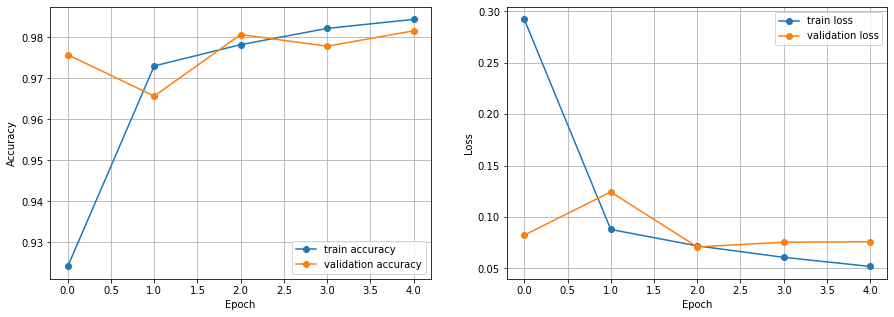

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [12]:
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0654 - accuracy: 0.9829

Test Loss: 0.06539520621299744

Test Accuracy: 0.9829000234603882


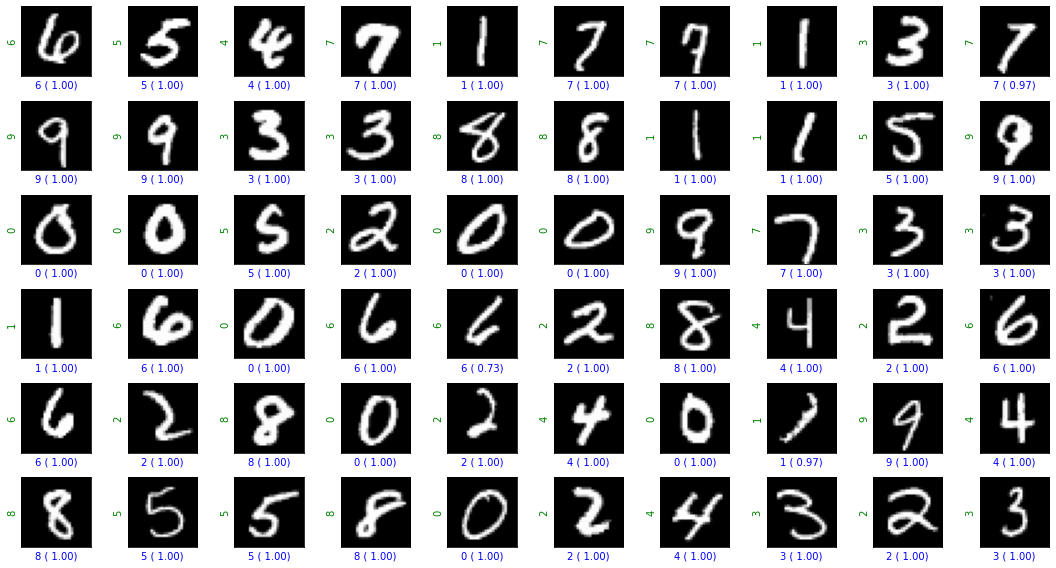

In [13]:
ROWS = 6
COLS = 10

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model_1.predict(sample_images)

i = 0

plt.figure(figsize=(15,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [14]:
model_2 = keras.Sequential([
    
    keras.Input(shape=(28,28,1)),
    
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    
    layers.Dense(units=10, activation='softmax')
])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [15]:
model_2.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [16]:
h2 = model_2.fit(x=X_train, y=Y_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 68s 40ms/step - loss: 1.5723 - accuracy: 0.5611 - val_loss: 0.5630 - val_accuracy: 0.8517
Epoch 2/5
1715/1715 [==============================] - 63s 37ms/step - loss: 0.2808 - accuracy: 0.9154 - val_loss: 0.1901 - val_accuracy: 0.9438
Epoch 3/5
1715/1715 [==============================] - 66s 39ms/step - loss: 0.1889 - accuracy: 0.9418 - val_loss: 0.1544 - val_accuracy: 0.9556
Epoch 4/5
1715/1715 [==============================] - 68s 40ms/step - loss: 0.1522 - accuracy: 0.9531 - val_loss: 0.1608 - val_accuracy: 0.9538
Epoch 5/5
1715/1715 [==============================] - 73s 43ms/step - loss: 0.1319 - accuracy: 0.9593 - val_loss: 0.1391 - val_accuracy: 0.9594


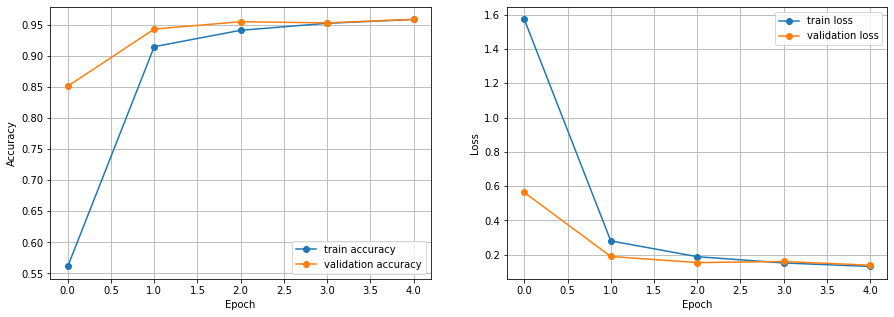

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [18]:
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.1278 - accuracy: 0.9628

Test Loss: 0.12782242894172668

Test Accuracy: 0.9628000259399414


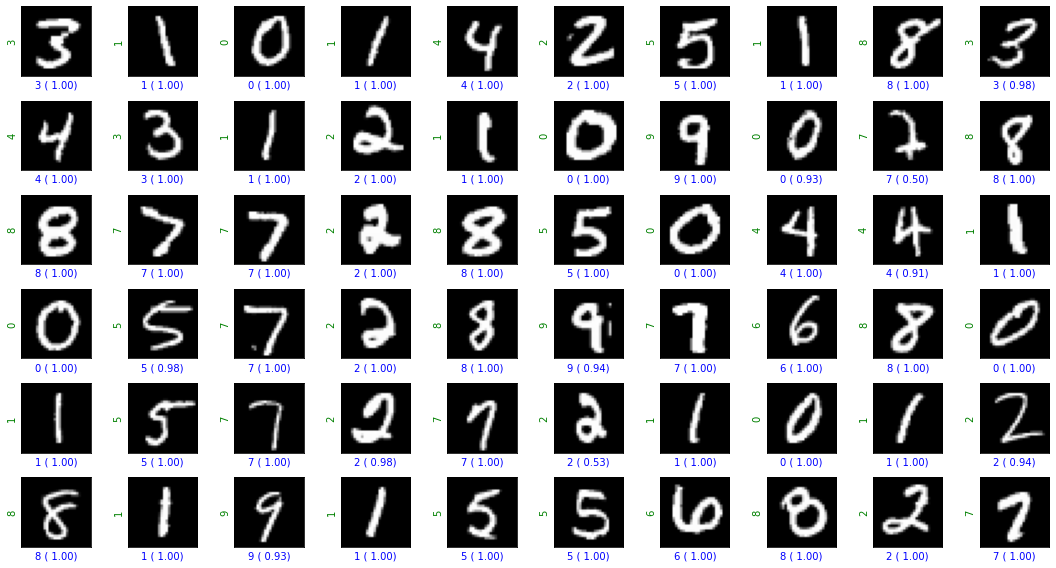

In [19]:
ROWS = 6
COLS = 10

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model_2.predict(sample_images)

i = 0

plt.figure(figsize=(15,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [20]:
model_3 = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(units=10, activation='softmax')
])
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

In [22]:
model_3.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [23]:
h3 = model_3.fit(x=X_train, y=Y_train, epochs=5, batch_size=28, validation_split=0.2)

Epoch 1/5
1715/1715 [==============================] - 51s 29ms/step - loss: 0.3413 - accuracy: 0.9273 - val_loss: 0.0940 - val_accuracy: 0.9745
Epoch 2/5
1715/1715 [==============================] - 49s 29ms/step - loss: 0.1022 - accuracy: 0.9739 - val_loss: 0.1002 - val_accuracy: 0.9788
Epoch 3/5
1715/1715 [==============================] - 51s 30ms/step - loss: 0.0893 - accuracy: 0.9783 - val_loss: 0.1062 - val_accuracy: 0.9783
Epoch 4/5
1715/1715 [==============================] - 50s 29ms/step - loss: 0.0866 - accuracy: 0.9799 - val_loss: 0.1234 - val_accuracy: 0.9765
Epoch 5/5
1715/1715 [==============================] - 51s 29ms/step - loss: 0.0927 - accuracy: 0.9806 - val_loss: 0.1102 - val_accuracy: 0.9821


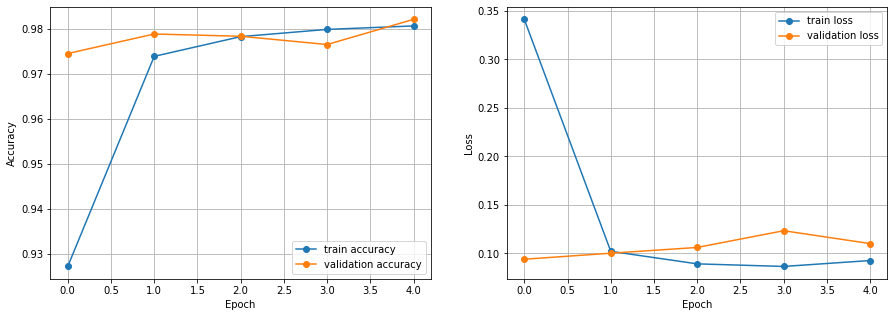

In [24]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [25]:
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('\nTest Loss:', test_loss)
print('\nTest Accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0923 - accuracy: 0.9827

Test Loss: 0.09233219921588898

Test Accuracy: 0.982699990272522


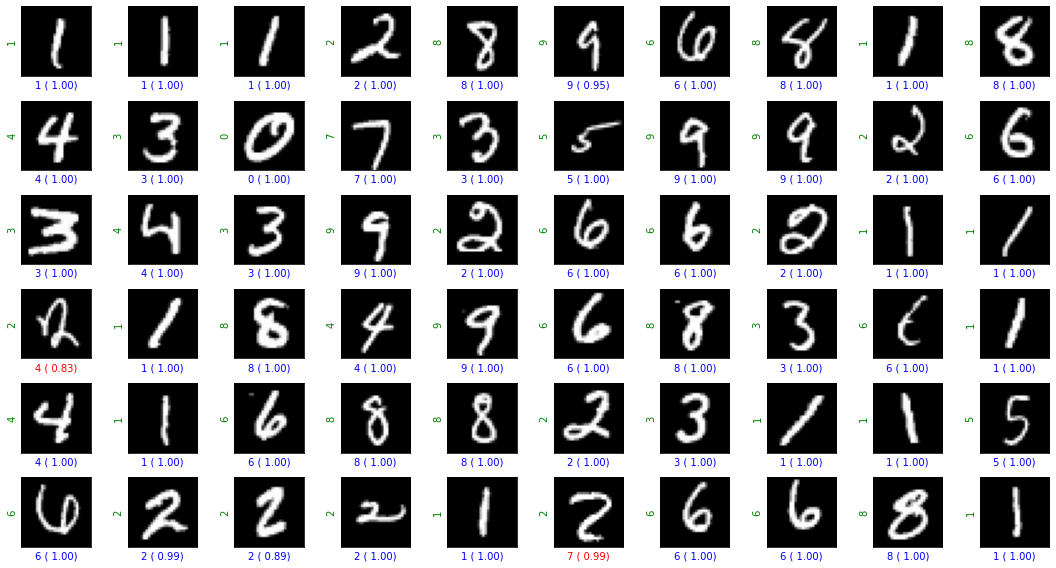

In [27]:
ROWS = 6
COLS = 10

random_indices = random.sample(range(X_test.shape[0]), ROWS*COLS)
sample_images = X_test[random_indices, :]
sample_labels = Y_test[random_indices]
predictions = model_3.predict(sample_images)

i = 0

plt.figure(figsize=(15,8))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()